In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [3]:
df = pd.read_csv('진주시_생산품_분리.csv')
df.head()

,순번,단지명,회사명,공장대표주소(도로명),공장대표주소(지번),업종번호,업종명,업종분류,전화번호,팩스번호,...,여종업원,외국인(남),외국인(여),종업원수,생산품,용지면적,제조시설면적,부대시설면적,건축면적,최종 생산품
0,1,진주상평일반산업단지,디와이이엔지,"경상남도 진주시 동진로 290(상대동, 호림철강)",경상남도 진주시 상대동 33-87 호림철강,"30320,",자동차 차체용 신품 부품 제조업,"자동차, 운송장비",055-761-8172,공람,...,6,0,0,10,자동차 부품,877.8,811.80,66.00,877.80,자동차/운송장비
1,2,진주상평일반산업단지,(유)동양프라스틱,경상남도 진주시 동진로264번길 12 (상대동) 외 1필지,경상남도 진주시 상대2동 313-2번지 외 1필지,"22232,",포장용 플라스틱 성형용기 제조업,"석유화학, 플라스틱",055-762-4588,055-757-1438,...,5,0,0,13,육묘상자,1858.2,645.41,0.00,645.41,농기계/농자재
2,3,진주상평일반산업단지,(유)유창이엔지,경상남도 진주시 돗골로58번길 19 (상평동),경상남도 진주시 상평동 201-4번지,"29210,",농업 및 임업용 기계 제조업,"금속가공, 기계",055-753-9396,055-753-1036,...,1,0,0,4,농기계부품,1322.3,629.00,171.64,800.64,농기계/농자재
3,4,진주상평일반산업단지,(유)화신테크,경상남도 진주시 남강로 1273 (상평동),경상남도 진주시 상평동 55-39번지,"23222, 23232",위생용 및 산업용 도자기 제조업 외 1 종,비금속,055-755-6811,055-755-2288,...,5,0,0,20,"수전금구, 가공타일 등",15724.0,7180.98,1779.00,8959.98,금속/기계/건자재 + 식품/바이오/의약
4,5,진주상평일반산업단지,(주)경남레이저산업,경상남도 진주시 공단로236번길 19-1 (상평동),경상남도 진주시 상평동 55-80,"25929,",그 외 기타 금속가공업,"금속가공, 기계",055-752-9902,공람,...,2,8,0,20,전동기부품,1636.0,1238.40,0.00,1238.40,금속/기계/건자재


In [4]:
# 생산품이 두 가지 이상인 기업만 뽑아내기
df_hybrid = df[df['최종 생산품'].str.contains(r'\+')].copy()

In [6]:
df_hybrid.head()

,순번,단지명,회사명,공장대표주소(도로명),공장대표주소(지번),업종번호,업종명,업종분류,전화번호,팩스번호,...,여종업원,외국인(남),외국인(여),종업원수,생산품,용지면적,제조시설면적,부대시설면적,건축면적,최종 생산품
3,4,진주상평일반산업단지,(유)화신테크,경상남도 진주시 남강로 1273 (상평동),경상남도 진주시 상평동 55-39번지,"23222, 23232",위생용 및 산업용 도자기 제조업 외 1 종,비금속,055-755-6811,055-755-2288,...,5,0,0,20,"수전금구, 가공타일 등",15724.0,7180.98,1779.00,8959.98,금속/기계/건자재 + 식품/바이오/의약
7,8,진주상평일반산업단지,(주)경일파츠테크,경상남도 진주시 동진로 326 (상대동),경상남도 진주시 상대동 33-141번지,"30400, 30202",자동차 재제조 부품 제조업 외 1 종,"자동차, 운송장비",15222118,공람,...,1,0,0,6,"재제조부품, 제작차",0.0,812.50,0.00,812.50,금속/기계/건자재 + 식품/바이오/의약
8,9,진주상평일반산업단지,(주)굿링크,경상남도 진주시 동진로 307 (상대동),경상남도 진주시 상대동 33-171번지,"28903, 26211, 26310, 26410, 26421, 26519, 2721...",교통 신호장치 제조업 외 8 종,"전기, 전자",055-742-0090,055-748-4168,...,3,0,0,39,"교통신호장치, 영상감시장치, 보안용 카메라, 영상감시 장치, 통합배선반",1312.0,661.17,342.17,1003.34,금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT
30,31,진주상평일반산업단지,(주)명림 2공장,경상남도 진주시 돗골로46번길 8 (상평동),경상남도 진주시 상평동 203-10번지,"25913, 25914, 25924",자동차용 금속 압형제품 제조업 외 2 종,"금속가공, 기계",055-758-7377,055-755-1443,...,1,0,0,3,"농기계부품, 자동차 부품, 방산및 항공기부품",1950.6,1121.58,258.15,1379.73,농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
31,32,진주상평일반산업단지,(주)명림 3공장,경상남도 진주시 돗골로58번길 12 (상평동),경상남도 진주시 상평동 202-12번지,"25200, 30399",무기 및 총포탄 제조업 외 1 종,"금속가공, 기계",055-758-7377,055-755-1443,...,0,0,0,1,"유형볼, 그외자동차부품",0.0,99.90,72.56,172.46,금속/기계/건자재 + 자동차/운송장비


In [7]:
df_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 3 to 1290
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   순번           299 non-null    int64  
 1   단지명          299 non-null    object 
 2   회사명          299 non-null    object 
 3   공장대표주소(도로명)  299 non-null    object 
 4   공장대표주소(지번)   299 non-null    object 
 5   업종번호         299 non-null    object 
 6   업종명          299 non-null    object 
 7   업종분류         299 non-null    object 
 8   전화번호         299 non-null    object 
 9   팩스번호         299 non-null    object 
 10  남종업원         299 non-null    int64  
 11  여종업원         299 non-null    int64  
 12  외국인(남)       299 non-null    int64  
 13  외국인(여)       299 non-null    int64  
 14  종업원수         299 non-null    int64  
 15  생산품          299 non-null    object 
 16  용지면적         299 non-null    float64
 17  제조시설면적       299 non-null    float64
 18  부대시설면적       299 non-null    float64
 19  건축면적        

In [9]:
df_hybrid['최종 생산품'].value_counts().reset_index()

,최종 생산품,count
0,농기계/농자재 + 자동차/운송장비,39
1,금속/기계/건자재 + 식품/바이오/의약,34
2,금속/기계/건자재 + 자동차/운송장비,27
3,금속/기계/건자재 + 농기계/농자재,15
4,금속/기계/건자재 + 생활/가구/인쇄/화학,15
5,식품/바이오/의약 + 전기/전자/IT,12
6,농기계/농자재 + 식품/바이오/의약,11
7,금속/기계/건자재 + 중장비/건설기계,11
8,금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT,11
9,금속/기계/건자재 + 전기/전자/IT,10


In [8]:
# 개수 확인
df_hybird_count = df_hybrid['최종 생산품'].value_counts().reset_index()
df_hybrid_count.columns = ['산업분류', '기업수']

,최종 생산품,count
0,농기계/농자재 + 자동차/운송장비,39
1,금속/기계/건자재 + 식품/바이오/의약,34
2,금속/기계/건자재 + 자동차/운송장비,27
3,금속/기계/건자재 + 농기계/농자재,15
4,금속/기계/건자재 + 생활/가구/인쇄/화학,15
5,식품/바이오/의약 + 전기/전자/IT,12
6,농기계/농자재 + 식품/바이오/의약,11
7,금속/기계/건자재 + 중장비/건설기계,11
8,금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT,11
9,금속/기계/건자재 + 전기/전자/IT,10


In [12]:
# 산업분류별로 그룹을 지어서 -> 개수(count)와 생산품 리스트(unique)를 뽑습니다.
df_hybrid_detail = df_hybrid.groupby('최종 생산품').agg(
    기업수=('생산품', 'count'),  # 기업 수 세기
    주요생산품_예시=('생산품', lambda x: ', '.join(x.unique()[:5]))  # 대표적인 생산품 5개만 쉼표로 이어붙여서 보여주기
).sort_values(by='기업수', ascending=False).reset_index()

# 결과 출력 (행이 길어질 수 있으니 컬럼 폭을 넓혀서 보여줍니다)
import pandas as pd
pd.set_option('display.max_colwidth', 100) # 컬럼 너비 늘리기 (글자 잘림 방지)

df_hybrid_detail.head(20) # 상위 20개 조합 확인

,최종 생산품,기업수,주요생산품_예시
0,농기계/농자재 + 자동차/운송장비,39,"자동차부품, 농기계부품, 자동차,농기계,선박부품, 농기계,자동차부품, 농기계부품, 자동차부품, 자동차,농기계부품"
1,금속/기계/건자재 + 식품/바이오/의약,34,"수전금구, 가공타일 등, 재제조부품, 제작차, 아스콘, 레미콘, 철재류,절단,절곡, 타일2,3차소성제품"
2,금속/기계/건자재 + 자동차/운송장비,27,"유형볼, 그외자동차부품, 자동차부품(기어, 샤프트류), 히치링크,브라켓트,드로우바, 기어, 축, 밋숀, 시보케이스 조합, 트럭프레임"
3,금속/기계/건자재 + 농기계/농자재,15,"샌드위치판넬, 농업용파이프, 농기계부품, 안전난간, 표지판, 천연데크제,각재,펠렛, 농기계부품(샤프트,플랜지), 농기계부품,금형"
4,금속/기계/건자재 + 생활/가구/인쇄/화학,15,"캠, 힌지, 금속탱크,압력용기,철구조물, 파렛트, 목재용기, 밸브, 역화방지기, 도로안전시설물,볼라드,도로표지병 등"
5,식품/바이오/의약 + 전기/전자/IT,12,"계장제장치, 빌딩자동제어장치, 분전반 등, 유무선통신장비, 방송장비, 경보기, 전기신호기, 기상장비, CCTV, 마을무선방송장치, 계장제어장치, 프로세서제어반 등, CCTV..."
6,농기계/농자재 + 식품/바이오/의약,11,"해충퇴치기, 손소독기, 방역용소독기, 맥아, 사료, 조미식품, 상황버섯추출물, 보조사료, 꿀벌응애균뚝, 파리응애균뚝, 파워미네랄, 탄저브렉골드, 유산균,미세조류,사료"
7,금속/기계/건자재 + 중장비/건설기계,11,"밸브, 유압부품, 전동기모터축,전동감속기 및 그부품, 펌프부품, 중장비유압부품, 중장비 PIM, BUSH, 치차감속기, 산업기계"
8,금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT,11,"교통신호장치, 영상감시장치, 보안용 카메라, 영상감시 장치, 통합배선반, LED조명기구, 배전반, PCB시장기판 등, LED램프, 교통신호등, 신호등철주,ED교통신호등, 최..."
9,금속/기계/건자재 + 전기/전자/IT,10,"방송기기,전광판전원부,카메라 제어모튤, 스텐물탱크, 정수기, 디젤 발전기, 내연기관 제조 및 재생산, LED등기구, 조명타워, LED등기구, 전자제품, 조명타워"


In [13]:
df_hybrid.head()

,순번,단지명,회사명,공장대표주소(도로명),공장대표주소(지번),업종번호,업종명,업종분류,전화번호,팩스번호,...,여종업원,외국인(남),외국인(여),종업원수,생산품,용지면적,제조시설면적,부대시설면적,건축면적,최종 생산품
3,4,진주상평일반산업단지,(유)화신테크,경상남도 진주시 남강로 1273 (상평동),경상남도 진주시 상평동 55-39번지,"23222, 23232",위생용 및 산업용 도자기 제조업 외 1 종,비금속,055-755-6811,055-755-2288,...,5,0,0,20,"수전금구, 가공타일 등",15724.0,7180.98,1779.00,8959.98,금속/기계/건자재 + 식품/바이오/의약
7,8,진주상평일반산업단지,(주)경일파츠테크,경상남도 진주시 동진로 326 (상대동),경상남도 진주시 상대동 33-141번지,"30400, 30202",자동차 재제조 부품 제조업 외 1 종,"자동차, 운송장비",15222118,공람,...,1,0,0,6,"재제조부품, 제작차",0.0,812.50,0.00,812.50,금속/기계/건자재 + 식품/바이오/의약
8,9,진주상평일반산업단지,(주)굿링크,경상남도 진주시 동진로 307 (상대동),경상남도 진주시 상대동 33-171번지,"28903, 26211, 26310, 26410, 26421, 26519, 27215, 28123, 28423",교통 신호장치 제조업 외 8 종,"전기, 전자",055-742-0090,055-748-4168,...,3,0,0,39,"교통신호장치, 영상감시장치, 보안용 카메라, 영상감시 장치, 통합배선반",1312.0,661.17,342.17,1003.34,금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT
30,31,진주상평일반산업단지,(주)명림 2공장,경상남도 진주시 돗골로46번길 8 (상평동),경상남도 진주시 상평동 203-10번지,"25913, 25914, 25924",자동차용 금속 압형제품 제조업 외 2 종,"금속가공, 기계",055-758-7377,055-755-1443,...,1,0,0,3,"농기계부품, 자동차 부품, 방산및 항공기부품",1950.6,1121.58,258.15,1379.73,농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
31,32,진주상평일반산업단지,(주)명림 3공장,경상남도 진주시 돗골로58번길 12 (상평동),경상남도 진주시 상평동 202-12번지,"25200, 30399",무기 및 총포탄 제조업 외 1 종,"금속가공, 기계",055-758-7377,055-755-1443,...,0,0,0,1,"유형볼, 그외자동차부품",0.0,99.90,72.56,172.46,금속/기계/건자재 + 자동차/운송장비


In [14]:
# 필요한 칼럼만 추출하기
cols = [
    '회사명', 
    '공장대표주소(도로명)', 
    '업종명', 
    '업종분류', 
    '생산품', 
    '최종 생산품'
]

av_cols = [c for c in cols if c in df_hybrid.columns]
df1 = df_hybrid[av_cols].copy()
df1.head()

,회사명,공장대표주소(도로명),업종명,업종분류,생산품,최종 생산품
3,(유)화신테크,경상남도 진주시 남강로 1273 (상평동),위생용 및 산업용 도자기 제조업 외 1 종,비금속,"수전금구, 가공타일 등",금속/기계/건자재 + 식품/바이오/의약
7,(주)경일파츠테크,경상남도 진주시 동진로 326 (상대동),자동차 재제조 부품 제조업 외 1 종,"자동차, 운송장비","재제조부품, 제작차",금속/기계/건자재 + 식품/바이오/의약
8,(주)굿링크,경상남도 진주시 동진로 307 (상대동),교통 신호장치 제조업 외 8 종,"전기, 전자","교통신호장치, 영상감시장치, 보안용 카메라, 영상감시 장치, 통합배선반",금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT
30,(주)명림 2공장,경상남도 진주시 돗골로46번길 8 (상평동),자동차용 금속 압형제품 제조업 외 2 종,"금속가공, 기계","농기계부품, 자동차 부품, 방산및 항공기부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
31,(주)명림 3공장,경상남도 진주시 돗골로58번길 12 (상평동),무기 및 총포탄 제조업 외 1 종,"금속가공, 기계","유형볼, 그외자동차부품",금속/기계/건자재 + 자동차/운송장비


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 3 to 1290
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   회사명          299 non-null    object
 1   공장대표주소(도로명)  299 non-null    object
 2   업종명          299 non-null    object
 3   업종분류         299 non-null    object
 4   생산품          299 non-null    object
 5   최종 생산품       299 non-null    object
dtypes: object(6)
memory usage: 16.4+ KB


In [17]:
# 1. 이미 항공 산업을 포함하고 있는 '선도 기업' 추출
df_aero_mix = df1[df1['최종 생산품'].str.contains('항공/우주/방산')]

print(f"항공 산업을 이미 병행 중인 기업 수: {len(df_aero_mix)}개")

# 이들은 항공 외에 무엇을 하고 있나?
print("\n[벤치마킹] 항공 병행 기업들의 주요 생산 품목:")
df_aero_mix[['회사명', '생산품', '최종 생산품']]

항공 산업을 이미 병행 중인 기업 수: 34개

[벤치마킹] 항공 병행 기업들의 주요 생산 품목:


,회사명,생산품,최종 생산품
30,(주)명림 2공장,"농기계부품, 자동차 부품, 방산및 항공기부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
132,대륭공업사,"자동차, 농기계, 항공기 부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
172,동광공업(주),"자동차부품,항공기부품,방산품",자동차/운송장비 + 항공/우주/방산
336,제이앤항공 주식회사,"감속기, 완충기 등, 항공기부품",중장비/건설기계 + 항공/우주/방산
440,(주)메카티엔에스,"산업용로봇, 공장자동화시스템, 항공우주선 및 보조장치, 항공기용 부품, 대형온습도환경조, 유인 항공기, 항공우주선 및 보조장치, 부품",금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT + 항공/우주/방산
442,(주)신화정공,"농기구,자동차,항공기부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
493,주식회사엔젤럭스,"항공부품, 수송기계, 레저장비",금속/기계/건자재 + 자동차/운송장비 + 항공/우주/방산
515,(주)바로텍시너지,"항공제어장치,로봇,시험장치, 영상시스템(돔형스크린), 시뮬레이터류",식품/바이오/의약 + 전기/전자/IT + 항공/우주/방산
554,동이정공,"중장비 및 농기계부품, 유압기기부품, 볼트 및 너트, 기어 및 동력전달장치, 자동차부품, 선박구성부부품, 항공기용 부품, 무기및총포탄, 전투용차량부품 외",금속/기계/건자재 + 농기계/농자재 + 식품/바이오/의약 + 자동차/운송장비 + 중장비/건설기계 + 항공/우주/방산
555,동이피엠씨(주),"자동차 및 항공기부품, 기어펌프, 연마부품",금속/기계/건자재 + 항공/우주/방산


In [22]:
# 1. 항공 산업은 '안 하고' 있는 기업만 남기기
df_candidates = df1[~df1['최종 생산품'].str.contains('항공/우주/방산')].copy()

# 2. 기술 연관성이 높은 유력 후보군 필터링
# 조건: 자동차, 금속/기계, 농기계, 전기/전자 중 하나라도 포함된 경우
target_keywords = ['자동차', '금속', '기계', '농기계', '전기', '전자']

# 람다 함수를 이용해 타겟 키워드가 하나라도 포함된 행만 추출
df_target_candidates = df_candidates[df_candidates['최종 생산품'].apply(
    lambda x: any(keyword in x for keyword in target_keywords)
)]

print(f"항공 전환 잠재 후보 기업")
df_target_candidates[['회사명', '생산품', '최종 생산품']]

항공 전환 잠재 후보 기업


,회사명,생산품,최종 생산품
3,(유)화신테크,"수전금구, 가공타일 등",금속/기계/건자재 + 식품/바이오/의약
7,(주)경일파츠테크,"재제조부품, 제작차",금속/기계/건자재 + 식품/바이오/의약
8,(주)굿링크,"교통신호장치, 영상감시장치, 보안용 카메라, 영상감시 장치, 통합배선반",금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT
31,(주)명림 3공장,"유형볼, 그외자동차부품",금속/기계/건자재 + 자동차/운송장비
35,(주)비아이지 동양,"자동차부품(기어, 샤프트류)",금속/기계/건자재 + 자동차/운송장비
...,...,...,...
1276,현대금속산업(주),"탭, 밸브, 금속 천장재, 철근연결구",금속/기계/건자재 + 식품/바이오/의약
1283,화성벤딩,"파이프,밸브가공품",금속/기계/건자재 + 식품/바이오/의약
1286,화인,"간판 및 광고물, 인쇄물",금속/기계/건자재 + 생활/가구/인쇄/화학
1289,효은철강,"농산물운반대, 건조대,파레트랙",금속/기계/건자재 + 식품/바이오/의약 + 중장비/건설기계


In [23]:
# 항공 부품 전환에 필수적인 핵심 기술 키워드
core_tech_keywords = [
    '기어', '샤프트', '밸브', '엔진', '유압', '정밀', '가공', 
    '열처리', '도금', '연마', '센서', '제어', '회로', '모터'
]

# 생산품 컬럼에서 위 키워드가 포함된 기업 찾기
def has_core_tech(product_text):
    if not isinstance(product_text, str):
        return False
    return any(tech in product_text for tech in core_tech_keywords)

# 필터링 적용
df_high_potential = df_target_candidates[df_target_candidates['생산품'].apply(has_core_tech)]

print(f"핵심 기술 보유 유력 후보 기업 수: {len(df_high_potential)}개")
print("\n[최우선 지원 대상] 핵심 기술 보유 기업 리스트:")
print(df_high_potential[['회사명', '생산품', '최종 생산품']])

df_high_potential

핵심 기술 보유 유력 후보 기업 수: 72개

[최우선 지원 대상] 핵심 기술 보유 기업 리스트:
             회사명                                   생산품  \
3        (유)화신테크                          수전금구, 가공타일 등   
35    (주)비아이지 동양                       자동차부품(기어, 샤프트류)   
60       (주)진성정밀             액체펌프, 건설장비 유압부품, 차량동력전달장치   
95          경일공업                        농기계부품(샤프트,플랜지)   
112         금우정밀                 자동차부품(바퀴,감속기어,카바,밸브등)   
...          ...                                   ...   
1166   주식회사 세진기업  신호등주, 금속기둥, 교통신호제어기, 신호표지, 주차관제, 투광등   
1209        진우정밀                  농기계부품(유압기어펌프,케이스,카바)   
1243        태인산전                    수배전반, 분전반, 전동기 제어반   
1276   현대금속산업(주)                  탭, 밸브, 금속 천장재, 철근연결구   
1283        화성벤딩                             파이프,밸브가공품   

                                              최종 생산품  
3                              금속/기계/건자재 + 식품/바이오/의약  
35                              금속/기계/건자재 + 자동차/운송장비  
60                   식품/바이오/의약 + 자동차/운송장비 + 중장비/건설기계  
95                          

,회사명,공장대표주소(도로명),업종명,업종분류,생산품,최종 생산품
3,(유)화신테크,경상남도 진주시 남강로 1273 (상평동),위생용 및 산업용 도자기 제조업 외 1 종,비금속,"수전금구, 가공타일 등",금속/기계/건자재 + 식품/바이오/의약
35,(주)비아이지 동양,경상남도 진주시 남강로1385번길 11 (상대동),기어 및 동력전달장치 제조업,"금속가공, 기계","자동차부품(기어, 샤프트류)",금속/기계/건자재 + 자동차/운송장비
60,(주)진성정밀,경상남도 진주시 남강로1385번길 27 (상대동),액체 펌프 제조업 외 2 종,"금속가공, 기계","액체펌프, 건설장비 유압부품, 차량동력전달장치",식품/바이오/의약 + 자동차/운송장비 + 중장비/건설기계
95,경일공업,경상남도 진주시 솔밭로32번길 11 (상평동),절삭가공 및 유사처리업,"금속가공, 기계","농기계부품(샤프트,플랜지)",금속/기계/건자재 + 농기계/농자재
112,금우정밀,경상남도 진주시 돗골로58번길 17 (상평동),그 외 자동차용 신품 부품 제조업 외 3 종,"자동차, 운송장비","자동차부품(바퀴,감속기어,카바,밸브등)",금속/기계/건자재 + 자동차/운송장비 + 중장비/건설기계
...,...,...,...,...,...,...
1166,주식회사 세진기업,경상남도 진주시 진성면 동부로1307번길 50-2 외 5필지,육상 금속 골조 구조재 제조업 외 5 종,"금속가공, 기계","신호등주, 금속기둥, 교통신호제어기, 신호표지, 주차관제, 투광등",금속/기계/건자재 + 생활/가구/인쇄/화학 + 식품/바이오/의약 + 전기/전자/IT
1209,진우정밀,경상남도 진주시 도동로28번길 18 (상평동),절삭가공 및 유사처리업,"금속가공, 기계","농기계부품(유압기어펌프,케이스,카바)",금속/기계/건자재 + 농기계/농자재
1243,태인산전,경상남도 진주시 지수면 방어산로 56,배전반 및 전기 자동제어반 제조업,"전기, 전자","수배전반, 분전반, 전동기 제어반",금속/기계/건자재 + 전기/전자/IT
1276,현대금속산업(주),경상남도 진주시 일반성면 동부로 2061-28,"탭, 밸브 및 유사장치 제조업 외 3 종","금속가공, 기계","탭, 밸브, 금속 천장재, 철근연결구",금속/기계/건자재 + 식품/바이오/의약


분석 대상 항공 관련 기업 수: 66개

=== 현재 항공/우주/방산 기업들의 핵심 생산품 키워드 (Top 30) ===
       키워드  빈도수
0       부품   27
1      항공기   17
2    항공기부품   13
3     항공기용   10
4       드론    7
5      자동차    5
6      치공구    4
7    농기계부품    3
8      농기계    3
9    자동차부품    3
10     하우징    3
11     태양광    3
12   항공우주선    2
13    보조장치    2
14     복합재    2
15      로봇    2
16      볼트    2
17      기어    2
18    방위산업    2
19      무인    2
20   무기화합물    2
21      전기    2
22     시제품    2
23   무인항공기    2
24  무선통신장비    2
25     방산및    1
26     방산품    1
27    기체부품    1
28     감속기    1
29     완충기    1


C:\Users\user\AppData\Local\Temp\ipykernel_20240\853229886.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_keywords.head(30), y='키워드', x='빈도수', palette='rocket')


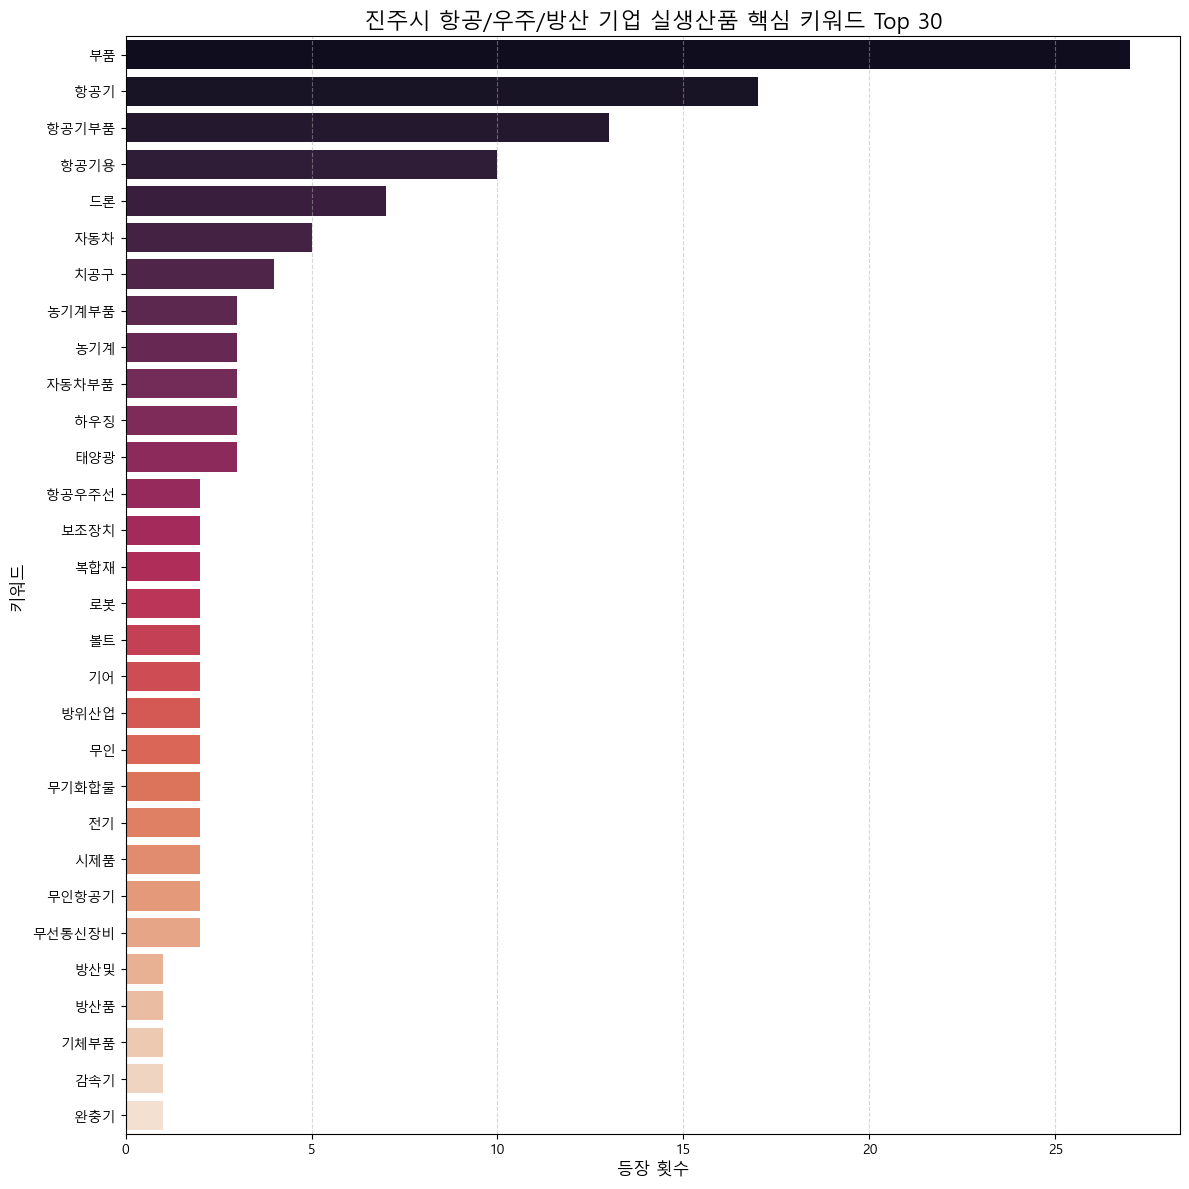

In [25]:
# 우선 항공/우주/방산 업종 영위하는 기업들이 실제로 무엇을 만들고 있는지 확인이 필요
from collections import Counter
# 1. 항공/우주/방산 기업만 추출

df_real_aero = df[df['최종 생산품'].str.contains('항공/우주/방산')].copy()

print(f"분석 대상 항공 관련 기업 수: {len(df_real_aero)}개")

# 2. 생산품 텍스트 분해 (Tokenizing)
all_keywords = []

# '생산품' 칼럼의 텍스트를 하나씩 꺼내서 단어 단위로 쪼개기
for text in df_real_aero['생산품']:
    if isinstance(text, str):
        # 1. 특수문자 제거 (괄호, 등) 및 콤마를 공백으로 치환
        clean_text = re.sub(r'[^\w\s]', ' ', text)
        
        # 2. 공백 기준으로 단어 자르기
        words = clean_text.split()
        
        # 3. 리스트에 담기 (한 글자 짜리 무의미한 단어는 제외 가능)
        for w in words:
            if len(w) > 1: # '등', '외' 같은 1글자 제외
                all_keywords.append(w)

# 3. 빈도수 계산 (Counter)
# 가장 많이 나온 단어 50개 추출
keyword_counts = Counter(all_keywords)
top_50_keywords = keyword_counts.most_common(50)

# 결과 데이터프레임 생성
df_keywords = pd.DataFrame(top_50_keywords, columns=['키워드', '빈도수'])

# 4. 결과 출력 및 시각화
print("\n=== 현재 항공/우주/방산 기업들의 핵심 생산품 키워드 (Top 30) ===")
print(df_keywords.head(30))

# 시각화
plt.figure(figsize=(12, 12))
plt.rc('font', family='Malgun Gothic') 

sns.barplot(data=df_keywords.head(30), y='키워드', x='빈도수', palette='rocket')

plt.title('진주시 항공/우주/방산 기업 실생산품 핵심 키워드 Top 30', fontsize=16)
plt.xlabel('등장 횟수', fontsize=12)
plt.ylabel('키워드', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

분석 대상 항공 관련 기업 수: 66개

=== 현재 항공/우주/방산 기업들의 핵심 생산품 키워드 (Top 30) ===
       키워드  빈도수
0       부품   27
1      항공기   17
2    항공기부품   13
3     항공기용   10
4       드론    7
5      자동차    5
6      치공구    4
7    농기계부품    3
8      농기계    3
9    자동차부품    3
10     하우징    3
11     태양광    3
12   항공우주선    2
13    보조장치    2
14     복합재    2
15      로봇    2
16      볼트    2
17      기어    2
18    방위산업    2
19      무인    2
20   무기화합물    2
21      전기    2
22     시제품    2
23   무인항공기    2
24  무선통신장비    2
25     방산및    1
26     방산품    1
27    기체부품    1
28     감속기    1
29     완충기    1


C:\Users\user\AppData\Local\Temp\ipykernel_20240\448240477.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_keywords.head(30), y='키워드', x='빈도수', palette='rocket')


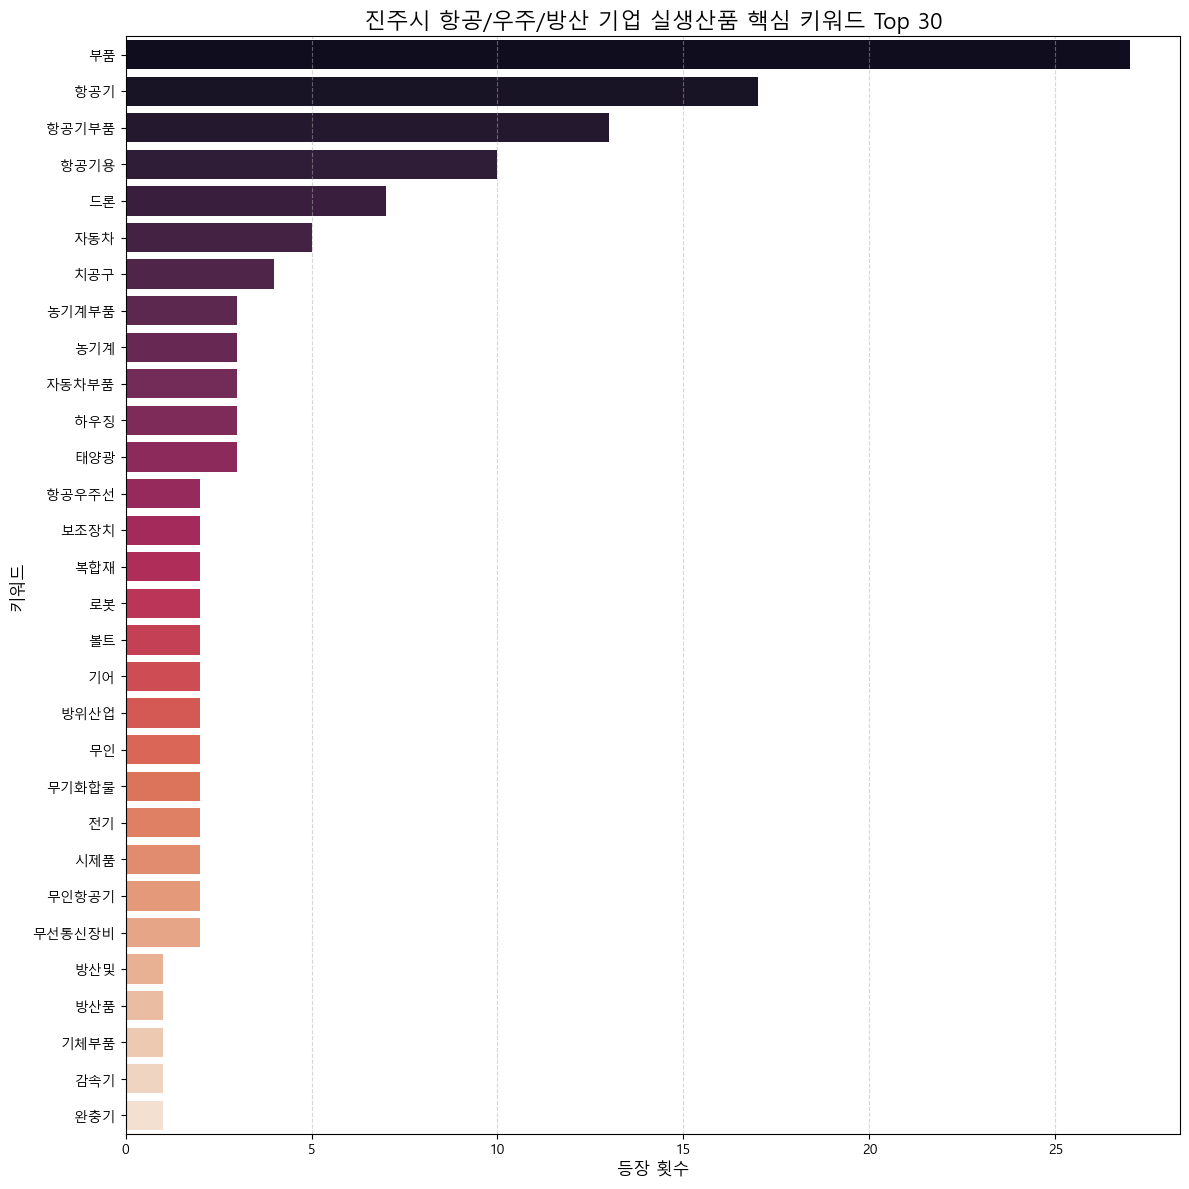

In [27]:

# 1. 항공/우주/방산 기업만 추출
# ---------------------------------------------------------
# '최종_산업분류'에 '항공/우주/방산'이 포함된 모든 기업(복합 기업 포함) 필터링
df_real_aero = df[df['최종 생산품'].str.contains('항공/우주/방산')].copy()

print(f"분석 대상 항공 관련 기업 수: {len(df_real_aero)}개")

# ---------------------------------------------------------
# 2. 생산품 텍스트 분해 (Tokenizing)
# ---------------------------------------------------------
all_keywords = []

# '생산품' 칼럼의 텍스트를 하나씩 꺼내서 단어 단위로 쪼갭니다.
for text in df_real_aero['생산품']:
    if isinstance(text, str):
        # 1. 특수문자 제거 (괄호, 등) 및 콤마를 공백으로 치환
        clean_text = re.sub(r'[^\w\s]', ' ', text)
        
        # 2. 공백 기준으로 단어 자르기
        words = clean_text.split()
        
        # 3. 리스트에 담기 (한 글자 짜리 무의미한 단어는 제외 가능)
        for w in words:
            if len(w) > 1: # '등', '외' 같은 1글자 제외
                all_keywords.append(w)

# ---------------------------------------------------------
# 3. 빈도수 계산 (Counter)
# ---------------------------------------------------------
# 가장 많이 나온 단어 50개 추출
keyword_counts = Counter(all_keywords)
top_50_keywords = keyword_counts.most_common(50)

# 결과 데이터프레임 생성
df_keywords = pd.DataFrame(top_50_keywords, columns=['키워드', '빈도수'])

# ---------------------------------------------------------
# 4. 결과 출력 및 시각화
# ---------------------------------------------------------
print("\n=== 현재 항공/우주/방산 기업들의 핵심 생산품 키워드 (Top 30) ===")
print(df_keywords.head(30))

# 시각화
plt.figure(figsize=(12, 12))
plt.rc('font', family='Malgun Gothic') 

sns.barplot(data=df_keywords.head(30), y='키워드', x='빈도수', palette='rocket')

plt.title('진주시 항공/우주/방산 기업 실생산품 핵심 키워드 Top 30', fontsize=16)
plt.xlabel('등장 횟수', fontsize=12)
plt.ylabel('키워드', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [32]:
# 1. 항공 분류가 '아닌' 기업들만 먼저 추출 (우리의 타겟)
# df1(복합산업) 데이터프레임을 사용합니다.

df1 = df.copy()
df_target = df1[~df1['최종 생산품'].str.contains('항공/우주/방산')].copy()

# ---------------------------------------------------------
# 2. [업그레이드] 실전 데이터 기반 핵심 기술 키워드 리스트
# ---------------------------------------------------------
# 아까 그래프에서 확인한 '찐' 키워드들을 대거 포함시킵니다.
final_tech_keywords = [
    # 기존 기계/가공 핵심
    '기어', '샤프트', '밸브', '엔진', '유압', '정밀', '연마', '도금', '열처리', 
    '센서', '제어', '회로', '모터',
    
    # [NEW] 그래프 분석으로 찾아낸 항공 특화 키워드
    '치공구', '지그', 'JIG',       # 항공 조립 필수 기술
    '복합재', '카본', '소재',       # 경량화 핵심 소재
    '감속기', '변속기', '동력전달', # 회전익(헬기/드론) 핵심
    '완충기', '쇼크', '댐퍼',       # 랜딩기어 핵심
    '하우징', '케이스',             # 정밀 보호 부품
    '시제품', '프로토'              # R&D 역량 보유
]

# ---------------------------------------------------------
# 3. 키워드 매칭 함수 (생산품에 이 단어가 있는가?)
# ---------------------------------------------------------
def has_aerospace_dna(product_text):
    if not isinstance(product_text, str):
        return False
    # 키워드 중 하나라도 포함되어 있으면 True
    return any(keyword in product_text for keyword in final_tech_keywords)

# ---------------------------------------------------------
# 4. 최종 후보군 필터링
# ---------------------------------------------------------
df_final_candidates = df_target[df_target['생산품'].apply(has_aerospace_dna)].copy()

# 보기 좋게 정리 (매칭된 키워드가 무엇인지도 표시)
def extract_matched_keywords(text):
    matched = [k for k in final_tech_keywords if k in text]
    return ', '.join(matched)

df_final_candidates['보유_핵심기술'] = df_final_candidates['생산품'].apply(extract_matched_keywords)

# ---------------------------------------------------------
# 5. 결과 출력
# ---------------------------------------------------------
print(f"✈️ 항공 산업 전환 유력 후보 기업 수: {len(df_final_candidates)}개")
print("\n=== [Top 10] 항공 부품 전환 유망 기업 리스트 ===")
# 주요 정보만 깔끔하게 출력
display_cols = ['회사명', '생산품', '최종 생산품', '보유_핵심기술']
print(df_final_candidates[display_cols].head(15))

# (선택) 엑셀 저장
df_final_candidates.to_csv("진주시_항공부품_전환_최종후보.xlsx", index=False)

✈️ 항공 산업 전환 유력 후보 기업 수: 222개

=== [Top 10] 항공 부품 전환 유망 기업 리스트 ===
           회사명                        생산품                           최종 생산품  \
13    (주)금성열처리                      금속열처리                        금속/기계/건자재   
21     (주)대창공업                 농기계부품(감속기)                          농기계/농자재   
33   (주)보성씨아이씨                         기어                        금속/기계/건자재   
35  (주)비아이지 동양            자동차부품(기어, 샤프트류)             금속/기계/건자재 + 자동차/운송장비   
36       (주)삼양                  자동차 부품 기어                         자동차/운송장비   
39     (주)세림정공                         기어                        금속/기계/건자재   
43     (주)신아정밀                        기어류                        금속/기계/건자재   
51     (주)우림정밀                    자동차엔진부품                         자동차/운송장비   
58   (주)제일기계공업                   기어 및 샤프트                        금속/기계/건자재   
59       (주)진성                    기어펌프 부품                        금속/기계/건자재   
60     (주)진성정밀  액체펌프, 건설장비 유압부품, 차량동력전달장치  식품/바이오/의약 + 자동차/운송장비 + 중장비/건설기계  

분석 대상 (항공+@ 복합 기업): 총 66개 사

=== ✈️ 항공 산업과 가장 많이 융합된 산업 순위 ===
          연관산업  기업수
0    금속/기계/건자재   14
1     자동차/운송장비   13
2      농기계/농자재   11
3    식품/바이오/의약    6
4     전기/전자/IT    6
5     중장비/건설기계    5
6  생활/가구/인쇄/화학    1


C:\Users\user\AppData\Local\Temp\ipykernel_20240\2124302647.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_partner_rank, x='기업수', y='연관산업', palette='Blues_r')


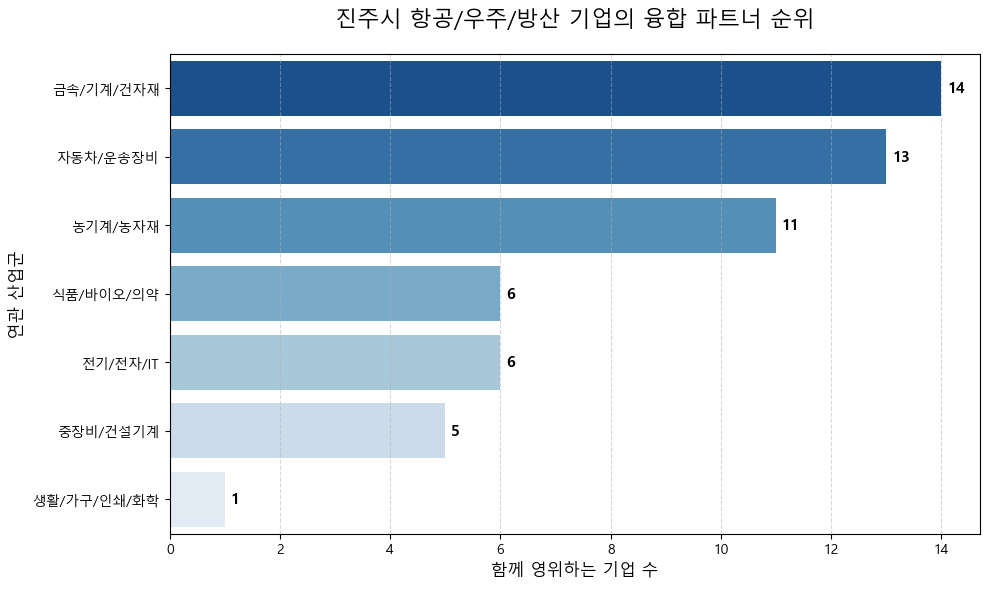

In [31]:
# df1: 2개 이상 생산하는 복합 기업 데이터프레임
# '최종_산업분류' (또는 '최종 생산품') 컬럼 사용
# 항공 산업을 포함하고 있는 기업만 필터링
df1 = df.copy()
df_aero_partners = df1[df1['최종 생산품'].str.contains('항공/우주/방산')].copy()

print(f"분석 대상 (항공+@ 복합 기업): 총 {len(df_aero_partners)}개 사")

# ---------------------------------------------------------
# 2. 파트너 산업 카운팅 로직
# ---------------------------------------------------------
partner_list = []

for cats in df_aero_partners['최종 생산품']:
    # ' + ' 기호로 쪼갭니다 (예: "금속 + 항공" -> ["금속", "항공"])
    splitted = cats.split(' + ')
    
    for industry in splitted:
        # 자기 자신('항공/우주/방산')은 제외하고 리스트에 담습니다.
        if '항공/우주/방산' not in industry:
            partner_list.append(industry)

# 빈도수 계산
partner_counts = Counter(partner_list)
df_partner_rank = pd.DataFrame(partner_counts.most_common(), columns=['연관산업', '기업수'])

# ---------------------------------------------------------
# 3. 결과 출력
# ---------------------------------------------------------
print("\n=== ✈️ 항공 산업과 가장 많이 융합된 산업 순위 ===")
print(df_partner_rank)

# ---------------------------------------------------------
# 4. 시각화 (막대 그래프)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.rc('font', family='Malgun Gothic') 

# 막대 그래프 그리기
ax = sns.barplot(data=df_partner_rank, x='기업수', y='연관산업', palette='Blues_r')

plt.title('진주시 항공/우주/방산 기업의 융합 파트너 순위', fontsize=16, pad=20)
plt.xlabel('함께 영위하는 기업 수', fontsize=12)
plt.ylabel('연관 산업군', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 숫자 표시
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', 
            ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

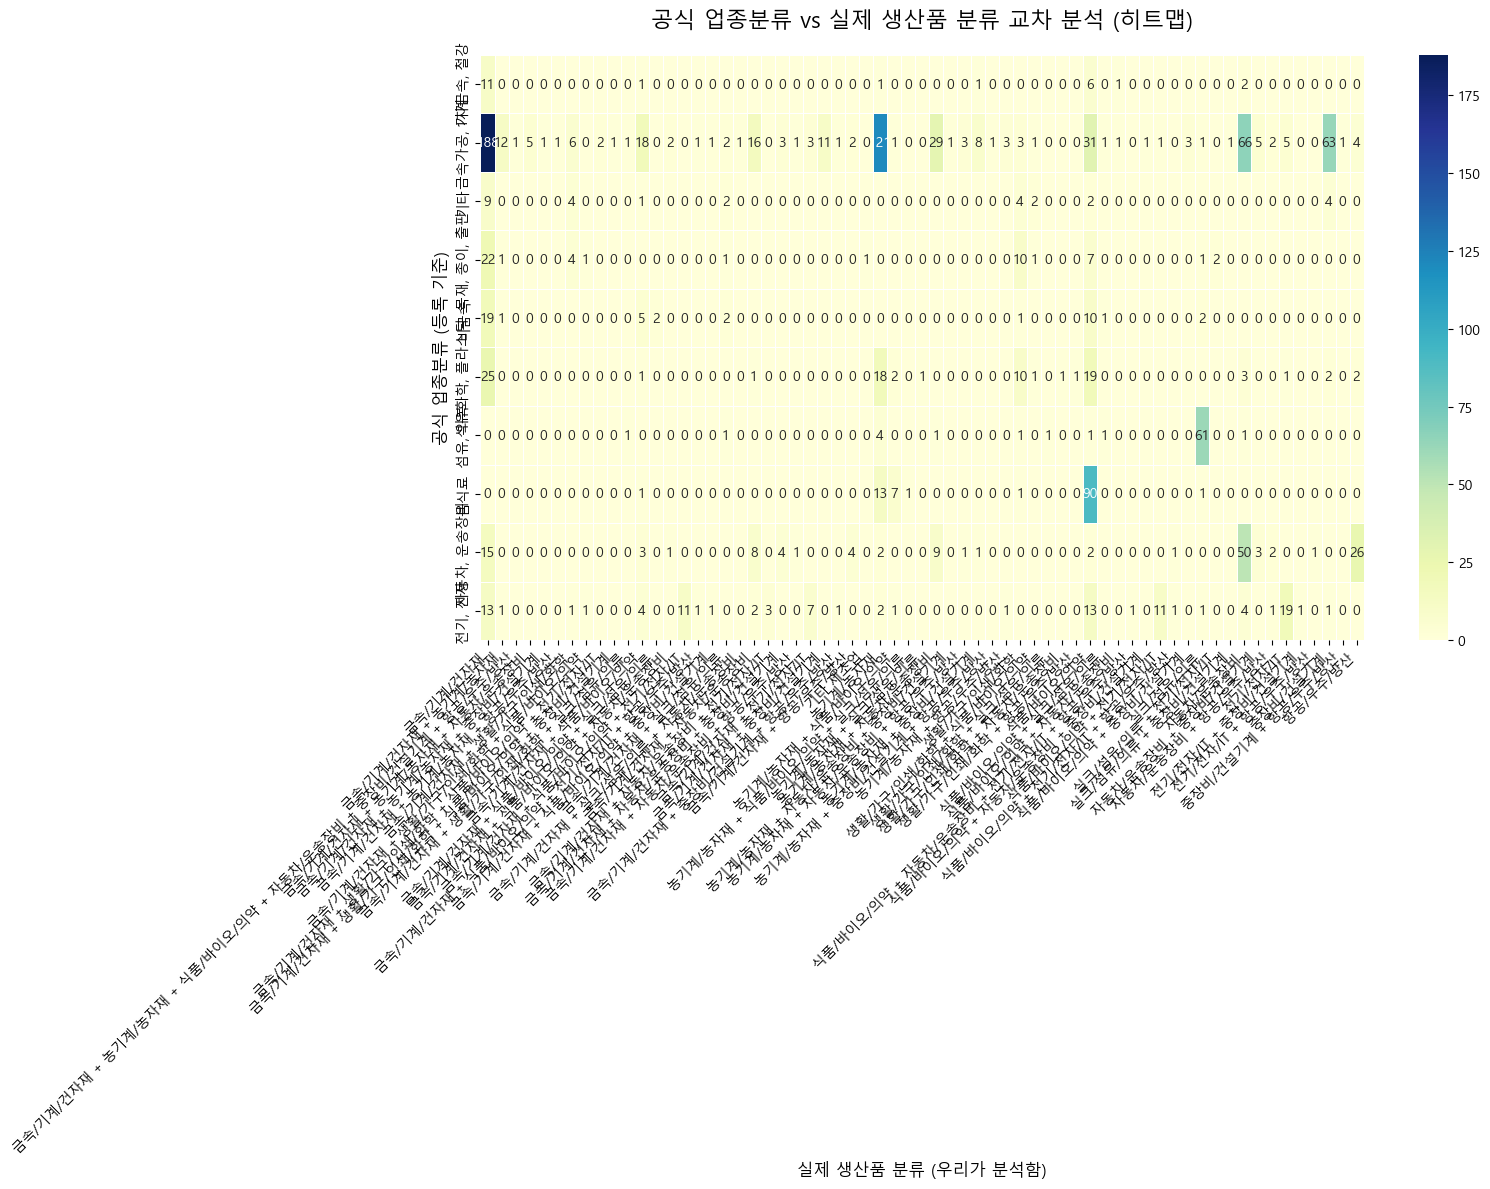

In [34]:
# ---------------------------------------------------------
# 1. 데이터 준비 (가장 최신 데이터프레임 사용, 예: df5)
# ---------------------------------------------------------
# 비교할 칼럼: '업종분류' (공식) vs '최종_산업분류' (우리가 만든 것)
# 업종분류가 너무 많으면 상위 15개만 추려서 봅니다.
top_official_codes = df['업종분류'].value_counts().nlargest(15).index
df_compare = df[df['업종분류'].isin(top_official_codes)]

# ---------------------------------------------------------
# 2. 교차표(Crosstab) 생성
# ---------------------------------------------------------
# 행(Row): 공식 업종분류
# 열(Col): 실제 생산품 분류
cross_tab = pd.crosstab(df_compare['업종분류'], df_compare['최종 생산품'])

# ---------------------------------------------------------
# 3. 히트맵 시각화
# ---------------------------------------------------------
plt.figure(figsize=(16, 12))
plt.rc('font', family='Malgun Gothic') 

# 히트맵 그리기 (숫자가 클수록 진한 색)
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('공식 업종분류 vs 실제 생산품 분류 교차 분석 (히트맵)', fontsize=16, pad=20)
plt.xlabel('실제 생산품 분류 (우리가 분석함)', fontsize=12)
plt.ylabel('공식 업종분류 (등록 기준)', fontsize=12)

plt.xticks(rotation=45, ha='right') # X축 라벨 기울이기
plt.tight_layout()
plt.show()

In [40]:
# ---------------------------------------------------------
# 케이스 스터디: "공식 분류"와 "실제 생산"이 다른 흥미로운 사례 추출
# ---------------------------------------------------------

# 예시 1: 공식적으로는 '금속가공, 기계'인데 -> 실제로는 '항공/우주/방산'을 하는 경우
hidden_aero = df[
    (df['업종분류'].str.contains('기계|금속')) & 
    (df['최종 생산품'].str.contains('항공/우주/방산'))
]

print(f"🔧 서류상 [기계/금속]이나 실제 [항공/방산] 제조 기업: {len(hidden_aero)}개")
display(hidden_aero[['회사명', '업종분류', '생산품', '최종 생산품']])

print("-" * 50)

# 예시 2: 공식적으로는 '자동차'인데 -> 실제로는 '항공'도 같이 하는 경우
hidden_hybrid = df[
    (df['업종분류'].str.contains('자동차')) & 
    (df['최종 생산품'].str.contains('항공/우주/방산'))
]

print(f"🚗 서류상 [자동차]이나 실제 [항공/방산] 제조 기업: {len(hidden_hybrid)}개")
hidden_hybrid[['회사명', '업종분류', '생산품', '최종 생산품']]

🔧 서류상 [기계/금속]이나 실제 [항공/방산] 제조 기업: 21개


,회사명,업종분류,생산품,최종 생산품
30,(주)명림 2공장,"금속가공, 기계","농기계부품, 자동차 부품, 방산및 항공기부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
132,대륭공업사,"금속가공, 기계","자동차, 농기계, 항공기 부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
172,동광공업(주),"금속가공, 기계","자동차부품,항공기부품,방산품",자동차/운송장비 + 항공/우주/방산
336,제이앤항공 주식회사,"금속가공, 기계","감속기, 완충기 등, 항공기부품",중장비/건설기계 + 항공/우주/방산
440,(주)메카티엔에스,"금속가공, 기계","산업용로봇, 공장자동화시스템, 항공우주선 및 보조장치, 항공기용 부품, 대형온습도환경조, 유인 항공기, 항공우주선 및 보조장치, 부품",금속/기계/건자재 + 식품/바이오/의약 + 전기/전자/IT + 항공/우주/방산
442,(주)신화정공,"금속가공, 기계","농기구,자동차,항공기부품",농기계/농자재 + 자동차/운송장비 + 항공/우주/방산
554,동이정공,"금속가공, 기계","중장비 및 농기계부품, 유압기기부품, 볼트 및 너트, 기어 및 동력전달장치, 자동차부품, 선박구성부부품, 항공기용 부품, 무기및총포탄, 전투용차량부품 외",금속/기계/건자재 + 농기계/농자재 + 식품/바이오/의약 + 자동차/운송장비 + 중장비/건설기계 + 항공/우주/방산
569,애니항공,"금속가공, 기계","항공기부품,디자인형울타리, 스틸그레이팅 등",금속/기계/건자재 + 항공/우주/방산
581,제이더블유하이텍,"금속가공, 기계","중장비부품, 농기계부품, 항공기부품 등",농기계/농자재 + 중장비/건설기계 + 항공/우주/방산
588,케이테크(주),"금속가공, 기계",총포류,항공/우주/방산


--------------------------------------------------
🚗 서류상 [자동차]이나 실제 [항공/방산] 제조 기업: 36개


,회사명,업종분류,생산품,최종 생산품
334,정화테크,"자동차, 운송장비",항공기 기체부품,항공/우주/방산
344,주식회사 에스디에어로,"자동차, 운송장비",항공기용 부품,항공/우주/방산
375,천룡정밀,"자동차, 운송장비",항공기 부품,항공/우주/방산
447,(주)에이엔에이치스트럭쳐,"자동차, 운송장비",항공기 부품,항공/우주/방산
448,(주)에이엔에이치스트럭쳐,"자동차, 운송장비",항공기 복합재 부품,항공/우주/방산
493,주식회사엔젤럭스,"자동차, 운송장비","항공부품, 수송기계, 레저장비",금속/기계/건자재 + 자동차/운송장비 + 항공/우주/방산
518,(주)비비테크,"자동차, 운송장비","항공기용 부품 및 치공구, 방산용 부품",항공/우주/방산
534,(주)포렉스,"자동차, 운송장비",항공기부품,항공/우주/방산
555,동이피엠씨(주),"자동차, 운송장비","자동차 및 항공기부품, 기어펌프, 연마부품",금속/기계/건자재 + 항공/우주/방산
571,에스피 에어로,"자동차, 운송장비",항공기부품(가스켓 등),항공/우주/방산


In [45]:
df[df['업종분류'].str.contains('방산')]

,순번,단지명,회사명,공장대표주소(도로명),공장대표주소(지번),업종번호,업종명,업종분류,전화번호,팩스번호,...,여종업원,외국인(남),외국인(여),종업원수,생산품,용지면적,제조시설면적,부대시설면적,건축면적,최종 생산품
